**Classifier (working version)**

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Graduation", "Retirement", "Baby shower", "Engagement", "Prom", "Valentine's Day", "New Year's Eve", "Easter", "Mother's Day", "Father's Day", "Wedding", "Bachelorette party", "Bachelor party", "Job promotion", "Thank you", "Get well soon", "Sympathy", "Congratulations", "Good luck", "Just because"],
    "interests": ["Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools", "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art", "Celebrities", "Flags", "HALLOWEEN", "Quotes", "Sports", "Thanksgiving", "Maps", "Romance", "Kitchen", "Musical Instruments", "Black Lives Matter", "Cannabis", "Vegan", "Birds", "Dinosaurs", "rock and roll", "Firearms", "Dances", "Sailing", "Jazz", "Christmas", "Greek Methology", "Life Style", "Planes", "Vintage", "Alphabets", "Weapons", "Insects", "Games", "JEWELRY", "Science", "Travel", "Cats", "Circus", "Lucky charms", "Wild West", "Dogs"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

category_order = ["emotions", "occasion", "interests", "audience", "personality"]

def classify_text(text):
    result = classifier(text, options["emotions"] + options["occasion"] + options["interests"] + options["audience"] + options["personality"])
    predicted_labels = []
    seen_labels = set()
    for label in result["labels"]:
        category = None
        for key, values in options.items():
            if label in values:
                category = key
                break
        if category and category not in seen_labels:
            predicted_labels.append({"category": category, "value": label})
            seen_labels.add(category)
        if len(predicted_labels) == 5:
            break
    return predicted_labels

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
text = input("Enter text to classify: ")

Enter text to classify: mom have 2 babies celebrating her birthday


In [ ]:
labels = classify_text(text)

In [ ]:
labels

[{'category': 'occasion', 'value': 'Birthday'},
 {'category': 'audience', 'value': 'Child Audience'},
 {'category': 'emotions', 'value': 'Sentimental and nostalgic'},
 {'category': 'interests', 'value': 'Human Organes'},
 {'category': 'personality', 'value': 'Bohemian and free-spirited'}]

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Apple is looking at buying U.K. startup for $1 billion. John Smith lives in New York."

# Tokenization
print("Tokenization:")
doc = nlp(text)
for token in doc:
    print(token.text)

print("\n")



# Named Entity Recognition (NER)
print("Named Entity Recognition:")
for ent in doc.ents:
    print(ent.text, ent.label_)

print("\n")





# Text Classification (Sample)
# This requires a trained model specific to your classification task.

# Information Extraction (Sample)
# This can involve extracting specific pieces of information or relationships between entities in the text.
# For example, extracting the subject and object of a sentence.

# Summarization (Sample)


Tokenization:
Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion
.
John
Smith
lives
in
New
York
.


Named Entity Recognition:
Apple ORG
U.K. GPE
$1 billion MONEY
John Smith PERSON
New York GPE




**options list updated to understand more the user request**



In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Charger le modèle BERT et le tokenizer pré-entraîné
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Définir les catégories de préférences
categories = ["emotions", "occasion", "interests", "audience", "personality"]

# Paragraphe fourni par le client
client_paragraph = "Apple is looking at buying U.K. startup for $1 billion. John Smith lives in New York."

# Prétraitement du paragraphe
inputs = tokenizer(client_paragraph, return_tensors="pt", padding=True, truncation=True)

# Classification du paragraphe
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)

# Options prédéfinies pour chaque catégorie de préférence
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Graduation", "Retirement", "Baby shower", "Engagement", "Prom", "Valentine's Day", "New Year's Eve", "Easter", "Mother's Day", "Father's Day", "Wedding", "Bachelorette party", "Bachelor party", "Job promotion", "Thank you", "Get well soon", "Sympathy", "Congratulations", "Good luck", "Just because"],
    "interests": ["Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools", "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art", "Celebrities", "Flags", "HALLOWEEN", "Quotes", "Sports", "Thanksgiving", "Maps", "Romance", "Kitchen", "Musical Instruments", "Black Lives Matter", "Cannabis", "Vegan", "Birds", "Dinosaurs", "rock and roll", "Firearms", "Dances", "Sailing", "Jazz", "Christmas", "Greek Methology", "Life Style", "Planes", "Vintage", "Alphabets", "Weapons", "Insects", "Games", "JEWELRY", "Science", "Travel", "Cats", "Circus", "Lucky charms", "Wild West", "Dogs"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}


# Initialiser les préférences classifiées
client_preferences = {category: [] for category in options}

# Mapper les indices de classe prédits aux options prédéfinies pour chaque catégorie de préférence
for category, prediction_index in zip(categories, predictions):
    # Récupérer l'option prédéfinie correspondant à l'indice de classe prédit
    predicted_option = options[category][prediction_index.item()]
    # Ajouter l'option prédite à la liste des préférences pour cette catégorie
    client_preferences[category].append(predicted_option)
#client_preferneces[category].nappend
# Afficher les préférences classifiées
print("Client preferences:")
print(client_preferences)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Client preferences:
{'emotions': ['Happiness and joy'], 'occasion': [], 'interests': [], 'audience': [], 'personality': []}


 **Bert - *emotions***

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Charger le tokenizer et le modèle pré-entraîné
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Paragraphe fourni par le client
client_paragraph = "i like do that ."

# Prétraitement du paragraphe et conversion en tensors
inputs = tokenizer(client_paragraph, return_tensors="pt", padding=True, truncation=True)

# Classification des émotions
with torch.no_grad():
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits)

# Convertir l'indice de classe prédit en émotion
sentiment_mapping = {
    0: "Negative",
    1: "Neutral",
    2: "Positive",
}
# Obtenir les sorties logits du modèle
logits = outputs.logits

# Afficher les sorties logits
print("Logits:", logits)

# Trouver l'indice de la classe prédite avec la plus grande probabilité
predicted_class_idx = torch.argmax(logits, dim=1).item()


# Vérifier si l'indice de classe prédit existe dans le dictionnaire de mappage
if predicted_class_idx in sentiment_mapping:
    predicted_sentiment = sentiment_mapping[predicted_class_idx]
else:
    predicted_sentiment = "Unknown"

# Afficher le sentiment prédit
print("Predicted sentiment:", predicted_sentiment)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Logits: tensor([[-2.6786, -1.9862,  0.6248,  1.9950,  1.5277]])
Predicted sentiment: Unknown


Zero*shot*classifier - transfert learning

In [ ]:
from transformers import pipeline

# Charger le pipeline de classification de texte avec un modèle pré-entraîné
classifier = pipeline("zero-shot-classification")

# Options prédéfinies pour chaque catégorie de préférence
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic","Other"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration","Other"],
    "interests": ["Animals","Nature","Inspiring Quotes","Arts","Construction","Zodiac", "Other"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

# Ordre des catégories
category_order = ["emotions", "occasion", "interests", "audience", "personality"]

# Nouveau texte à classifier
new_paragraph = "mom have 2 babies celebrating her birthday"

# Convertir les valeurs du dictionnaire en liste
labels = []
for category in category_order:
    labels.extend(options[category])

# Classification du nouveau texte
result = classifier(new_paragraph, labels)

# Affichage des catégories prédites dans l'ordre spécifié
for category in category_order:
    predicted_label = result["labels"][labels.index(options[category][0])]
    print(f"{category}: {predicted_label}")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


emotions: Birthday
occasion: Inspiration and motivation
interests: Other
audience: Love and romance
personality: Anniversary


**Evaluation du modèle**

first try

In [ ]:
from transformers import pipeline

# Load the text classification pipeline with the specified model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Predefined options for each category
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic","Other"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration","Other"],
    "interests": ["Animals","Nature","Inspiring Quotes","Arts","Construction","Zodiac", "Other"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

# Order of categories
category_order = ["emotions", "occasion", "interests", "audience", "personality"]

# New text to classify
new_paragraph = "mom have 2 babies celebrating her birthday"

# Convert the dictionary values into lists
labels = []
for category in category_order:
    labels.extend(options[category])

# Classification of the new text
result = classifier(new_paragraph, labels)

# Evaluation of the model
correct_predictions = 0
total_predictions = 0

for category in category_order:
    ground_truth_label = options[category][0]
    predicted_labels = result["labels"]
    scores = result["scores"]
    category_labels = labels[labels.index(options[category][0]):labels.index(options[category][-1])+1]
    category_scores = [scores[labels.index(label)] for label in category_labels]

    if len(category_scores) > 0:
        max_score_index = category_scores.index(max(category_scores))
        predicted_label = category_labels[max_score_index]

        total_predictions += 1
        if predicted_label == ground_truth_label:
            correct_predictions += 1

        print(f"{category}: {predicted_label}")
    else:
        print(f"No predicted label for {category}")

accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy}%")

emotions: Love and romance
No predicted label for occasion
No predicted label for interests
audience: Child Audience
personality: Casual and laid-back
Accuracy: 100.0%


second try

In [ ]:
from transformers import pipeline

# Load the text classification pipeline with the specified model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Predefined options for each category
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic","Other"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration","Other"],
    "interests": ["Animals","Nature","Inspiring Quotes","Arts","Construction","Zodiac", "Other"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

# Order of categories
category_order = ["emotions", "occasion", "interests", "audience", "personality"]

# New text to classify
new_paragraph = "mom have 2 babies celebrating her birthday"

# Convert the dictionary values into lists
labels = []
for category in category_order:
    labels.extend(options[category])

# Classification of the new text
result = classifier(new_paragraph, labels)

# Evaluation of the model
correct_predictions = 0

for category in category_order:
    ground_truth_label = options[category][0]
    predicted_labels = result["labels"]

    if ground_truth_label in predicted_labels:
        correct_predictions += 1

accuracy = (correct_predictions / len(category_order)) * 100
print(f"Accuracy: {accuracy}%")

Accuracy: 100.0%


In [ ]:
from transformers import pipeline

# Charger le pipeline de classification de texte avec un modèle pré-entraîné
classifier = pipeline("zero-shot-classification")

# Options prédéfinies pour chaque catégorie de préférence
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Graduation", "Retirement" "Valentine's Day", "New Year's Eve", "Easter", "Mother's Day", "Father's Day", "Wedding","Other"],
    "interests": ["Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools", "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art", "Celebrities",  "HALLOWEEN", "Quotes", "Sports", "Other"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

# Nouveau texte à classifier
new_paragraph = "j'ai un bébé du 12 mois"

# Convertir les valeurs du dictionnaire en liste
labels = []
for values in options.values():
    labels.extend(values)

# Classification du nouveau texte
result = classifier(new_paragraph, labels)

# Affichage des catégories prédites
for category, predicted_label in zip(options.keys(), result["labels"]):
    print(f"{category}: {predicted_label}")

#text a classifier
#text = " j'ai un volsvaken d'age 50 ans..."

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


emotions: Birthday
occasion: Child Audience
interests: Anniversary
audience: Bohemian and free-spirited
personality: Teen Audience


**Second Step : use extracted classes to recommand product from our db**

output.csv link : https://drive.google.com/file/d/1NOsfqA-5E3OlClEz3POYvidl09W3HcHv/view?usp=sharing

first try (take long time)

Extract classes from descriptions list and from nlp text then do similarity

In [ ]:
from transformers import pipeline
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the CSV and extract relevant columns
data = pd.read_csv("output.csv")
descriptions = data["Description"]
classes = data["Tags"]
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Graduation", "Retirement", "Baby shower", "Engagement", "Prom", "Valentine's Day", "New Year's Eve", "Easter", "Mother's Day", "Father's Day", "Wedding", "Bachelorette party", "Bachelor party", "Job promotion", "Thank you", "Get well soon", "Sympathy", "Congratulations", "Good luck", "Just because"],
    "interests": ["Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools", "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art", "Celebrities", "Flags", "HALLOWEEN", "Quotes", "Sports", "Thanksgiving", "Maps", "Romance", "Kitchen", "Musical Instruments", "Black Lives Matter", "Cannabis", "Vegan", "Birds", "Dinosaurs", "rock and roll", "Firearms", "Dances", "Sailing", "Jazz", "Christmas", "Greek Methology", "Life Style", "Planes", "Vintage", "Alphabets", "Weapons", "Insects", "Games", "JEWELRY", "Science", "Travel", "Cats", "Circus", "Lucky charms", "Wild West", "Dogs"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}


# Preprocess the descriptions and responses

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# User input text
new_paragraph = "j'ai un bébé du 12 mois"

# Classify the user input text
result = classifier(new_paragraph, list(options.keys()))

# Classify the descriptions
classified_classes = []
for description in descriptions:
    result_desc = classifier(description, list(options.keys()))
    classified_classes.append(result_desc["labels"])

# Calculate cosine similarity
similarity_scores = cosine_similarity([result["scores"]], classified_classes)

# Get indices of top products for each class
top_products_indices = similarity_scores.argsort(axis=1)[:, ::-1]

# Recommend products for each class
for i, class_name in enumerate(options.keys()):
    print(f"Recommended products for {class_name}:")
    for product_index in top_products_indices[0]:
        print(data.loc[product_index]["Title"])

FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

second try

**Extract unique keywords from the long list of descriptions and then calculate the similarity with the result of the NLP classification **`texte en gras`**

In [ ]:
from transformers import pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Load the CSV and extract relevant columns
data = pd.read_csv("output.csv")
descriptions = data["Description"]
classes = data["Tags"]

# Define the options for each class
options = {
    "emotions": ["Love and romance", "Happiness and joy", "Peace and tranquility", "Inspiration and motivation", "Sentimental and nostalgic"],
    "occasion": ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Other"],
    "interests": ["Animals", "Nature", "Inspiring quotes", "Art/Design", "Constructions", "Zodiac", "Other"],
    "audience": ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"],
    "personality": ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde", "Bohemian and free-spirited", "Classic and timeless"]
}

# Preprocess the descriptions and responses
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)

    # Tokenize words and filter stopwords
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.lower() not in stop_words and word.isalpha()]

    # Part-of-speech tagging
    tagged_words = pos_tag(words)

    # Named Entity Recognition (NER)
    chunked_words = ne_chunk(tagged_words)

    # Extract unique keywords
    keywords = []
    for word in chunked_words:
        if hasattr(word, 'label') and word.label() == 'PERSON':
            keywords.append(word[0][0])
        else:
            keywords.append(word[0])

    return " ".join(set(keywords))

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# User input text
new_paragraph = "j'ai un bébé du 12 mois"

# Classify the user input text
result = classifier(new_paragraph, list(options.keys()))

# Extract unique keywords from descriptions
description_keywords = []
for description in descriptions:
    keywords = preprocess_text(description)
    description_keywords.append(keywords)

# Convert description_keywords to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
description_vectors = vectorizer.fit_transform(description_keywords)

# Convert result["scores"] to a numerical vector
result_vector = vectorizer.transform([" ".join(result["scores"])])

# Calculate cosine similarity
similarity_scores = cosine_similarity(result_vector, description_vectors)

# Get indices of top products
top_products_indices = similarity_scores.argsort(axis=1)[:, ::-1]

# Recommend products
for i, class_name in enumerate(options.keys()):
    print(f"Recommended products for {class_name}:")
    for product_index in top_products_indices[0]:
        print(data.loc[product_index]["Title"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


TypeError: sequence item 0: expected str instance, float found

**Read Products List from shopify with API <br> 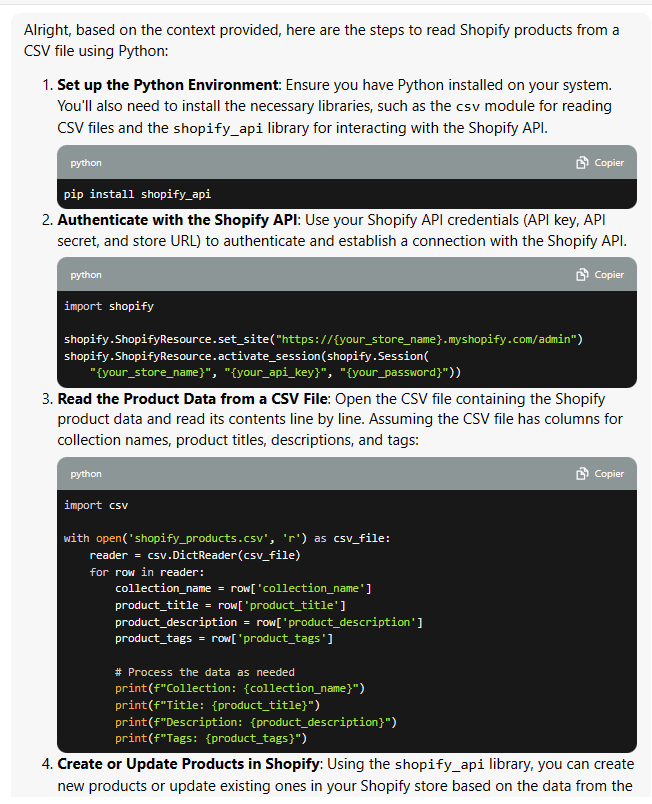**

4. product = shopify.Product() <br>
product.title = product_title <br>
product.body_html = product_description <br>
product.tags = product_tags <br>
product.collection_ids = [shopify.CollecionReferenc].find_by_name <br>(collection_name).id <br>
product.save()

**Reference for NER Model (Other than we have)** : https://zhoubeiqi.medium.com/named-entity-recognition-ner-using-keras-lstm-spacy-da3ea63d24c5



 **[Test Accuracy: 0.9789]**

**Next Steps**
<p style="front-size:16px;"> optimise products db to show categories <br>
cousine similarity categories nlp classes <br>
then cousine similarity for products list<br>
--> show products -> show similars if no -> show nlp recommendation based on user input </p>

<b> <b>

***General Chat Bot Code that implement NLP***

In [ ]:
import nltk

# Tokenization
def tokenize(text):
    return nltk.word_tokenize(text)

# Part-of-Speech Tagging
def pos_tag(tokens):
    return nltk.pos_tag(tokens)

# Named Entity Recognition
def ner(tokens):
    return nltk.ne_chunk(tokens)

# Dependency Parsing
def dependency_parse(tokens):
    return nltk.dependency_parse(tokens)

# Semantic Role Labeling
def srl(tokens):
    return nltk.sem.role_srl(tokens)

# Knowledge Base
knowledge_base = {
    "weather": {
        "today": "Sunny",
        "tomorrow": "Rainy"
    },
    "news": {
        "latest": "New COVID-19 variant discovered"
    }
}

# Dialogue Management
def dialogue_manager(user_input):
    # Parse user input
    tokens = tokenize(user_input)
    pos_tags = pos_tag(tokens)
    ner_tags = ner(tokens)
    dependency_tree = dependency_parse(tokens)
    srl_tags = srl(tokens)

    # Extract relevant information from user input
    # ...

    # Query knowledge base
    # ...

    # Generate response
    # ...

# Natural Language Generation
def generate_response(response_data):
    # Use template-based generation, statistical generation, or neural network-based generation
    # ...

# Main loop
while True:
    user_input = input("You: ")
    response = dialogue_manager(user_input)
    print("Chatbot:", generate_response(response))